<a href="https://colab.research.google.com/github/shreyansh080603/GDSC_Final_tasks/blob/main/cat_vs_dog_classifiern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:09<00:00, 101MB/s] 
100% 812M/812M [00:09<00:00, 89.0MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile
df ='/content/dogs-vs-cats.zip'
with ZipFile(df,'r') as read:
  read.extractall()
  print('extracted')

extracted


In [7]:
from zipfile import ZipFile
df ='/content/train.zip'
with ZipFile(df,'r') as read:
  read.extractall()
  print('extracted')

extracted


In [9]:
import os
path, dirs, files = next(os.walk('/content/train'))
count = len(files)
print('Number of images', count)

Number of images 25000


In [23]:
 names= os.listdir('/content/train')
print(names)

['cat.4885.jpg', 'dog.11609.jpg', 'dog.11851.jpg', 'dog.8761.jpg', 'dog.2283.jpg', 'dog.12329.jpg', 'dog.6793.jpg', 'dog.9917.jpg', 'dog.3873.jpg', 'cat.11537.jpg', 'dog.4126.jpg', 'dog.7287.jpg', 'dog.6228.jpg', 'cat.1317.jpg', 'cat.8018.jpg', 'dog.10249.jpg', 'dog.2320.jpg', 'cat.10803.jpg', 'dog.12496.jpg', 'cat.6090.jpg', 'dog.12005.jpg', 'dog.9169.jpg', 'cat.7853.jpg', 'dog.2971.jpg', 'dog.2509.jpg', 'dog.6820.jpg', 'dog.8664.jpg', 'dog.10604.jpg', 'dog.230.jpg', 'dog.6384.jpg', 'dog.7962.jpg', 'dog.10793.jpg', 'cat.7602.jpg', 'cat.3310.jpg', 'cat.6890.jpg', 'dog.11088.jpg', 'cat.9905.jpg', 'cat.4811.jpg', 'cat.4372.jpg', 'dog.1845.jpg', 'cat.343.jpg', 'cat.5595.jpg', 'dog.3971.jpg', 'cat.6664.jpg', 'cat.7690.jpg', 'cat.10310.jpg', 'dog.5047.jpg', 'dog.8054.jpg', 'dog.5035.jpg', 'cat.3711.jpg', 'dog.7592.jpg', 'dog.10781.jpg', 'cat.8667.jpg', 'cat.1900.jpg', 'dog.3529.jpg', 'dog.273.jpg', 'dog.879.jpg', 'cat.4505.jpg', 'cat.3003.jpg', 'dog.11459.jpg', 'cat.8057.jpg', 'dog.1829.jpg

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

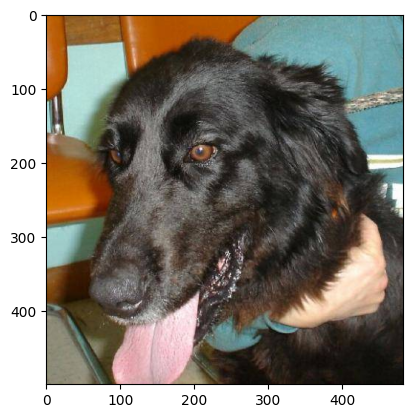

In [12]:
img = mpimg.imread('/content/train/dog.11545.jpg')
imgplt = plt.imshow(img)
plt.show()

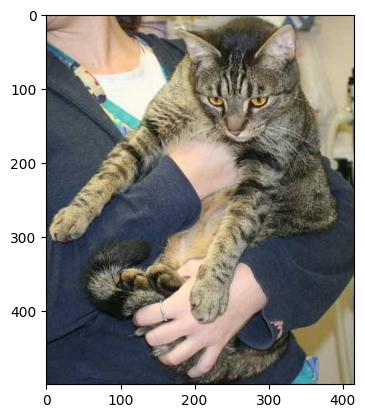

In [13]:
img = mpimg.imread('/content/train/cat.12208.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
file_names = os.listdir('/content/train')

for i in range(10):
  name = file_names[i]
  print(name[0:3])

cat
dog
dog
dog
dog
dog
dog
dog
dog
cat


In [15]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count = dog_count + 1
  else:
    cat_count = cat_count + 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [16]:
os.mkdir('/content/resized_image')

In [19]:
original_folder = '/content/train/'
resized_folder = '/content/resized_image/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [24]:
name = os.listdir('/content/resized_image/')
print(name)

['cat.4885.jpg', 'dog.11609.jpg', 'dog.11851.jpg', 'dog.8761.jpg', 'dog.2283.jpg', 'dog.12329.jpg', 'dog.6793.jpg', 'dog.9917.jpg', 'dog.3873.jpg', 'cat.11537.jpg', 'dog.4126.jpg', 'dog.7287.jpg', 'dog.6228.jpg', 'cat.1317.jpg', 'cat.8018.jpg', 'dog.10249.jpg', 'dog.2320.jpg', 'cat.10803.jpg', 'dog.12496.jpg', 'cat.6090.jpg', 'dog.12005.jpg', 'dog.9169.jpg', 'cat.7853.jpg', 'dog.2971.jpg', 'dog.2509.jpg', 'dog.6820.jpg', 'dog.8664.jpg', 'dog.10604.jpg', 'dog.230.jpg', 'dog.6384.jpg', 'dog.7962.jpg', 'dog.10793.jpg', 'cat.7602.jpg', 'cat.3310.jpg', 'cat.6890.jpg', 'dog.11088.jpg', 'cat.9905.jpg', 'cat.4811.jpg', 'cat.4372.jpg', 'dog.1845.jpg', 'cat.343.jpg', 'cat.5595.jpg', 'dog.3971.jpg', 'cat.6664.jpg', 'cat.7690.jpg', 'cat.10310.jpg', 'dog.5047.jpg', 'dog.8054.jpg', 'dog.5035.jpg', 'cat.3711.jpg', 'dog.7592.jpg', 'dog.10781.jpg', 'cat.8667.jpg', 'cat.1900.jpg', 'dog.3529.jpg', 'dog.273.jpg', 'dog.879.jpg', 'cat.4505.jpg', 'cat.3003.jpg', 'dog.11459.jpg', 'cat.8057.jpg', 'dog.1829.jpg

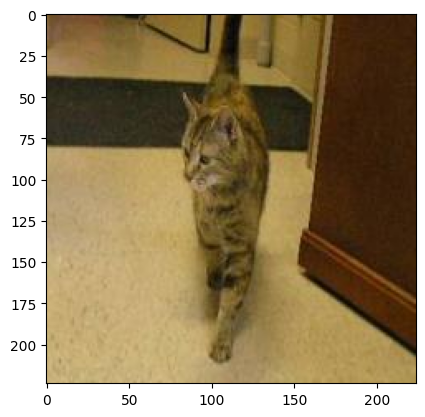

In [25]:
img = mpimg.imread('/content/resized_image/cat.4885.jpg')
imgplt = plt.imshow(img)
plt.show()

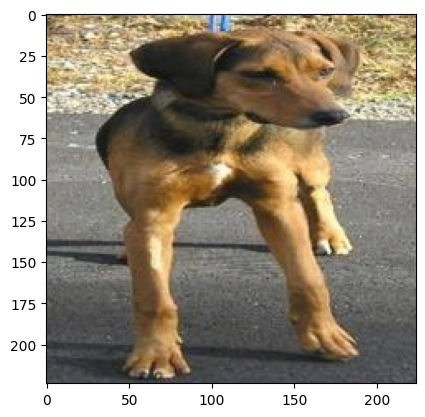

In [26]:
img = mpimg.imread('/content/resized_image/dog.10249.jpg')
imgplt = plt.imshow(img)
plt.show()

In [29]:
filenames = os.listdir('/content/resized_image')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [31]:
print(filenames[0:10])
print(len(filenames))

['cat.4885.jpg', 'dog.11609.jpg', 'dog.11851.jpg', 'dog.8761.jpg', 'dog.2283.jpg', 'dog.12329.jpg', 'dog.6793.jpg', 'dog.9917.jpg', 'dog.3873.jpg', 'cat.11537.jpg']
2000


In [32]:
print(labels[0:10])
print(len(labels))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
2000


In [34]:
cat_nc,dogs_nc =  np.unique(labels, return_counts=True)
print(dogs_nc)
print(cat_nc)

[1024  976]
[0 1]


In [44]:
import cv2
import glob

In [49]:
image_directory = '/content/resized_image/'
image_extension = ['jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [50]:
print(dog_cat_images)

[[[[ 61 108 136]
   [ 47  94 122]
   [ 38  80 109]
   ...
   [  6  28  56]
   [ 10  32  60]
   [ 15  37  65]]

  [[ 61 108 136]
   [ 49  93 122]
   [ 39  81 110]
   ...
   [  8  30  58]
   [ 10  32  60]
   [ 14  36  64]]

  [[ 63 107 136]
   [ 50  94 123]
   [ 40  82 111]
   ...
   [ 11  33  61]
   [ 11  33  61]
   [ 12  34  62]]

  ...

  [[126 180 203]
   [126 180 203]
   [125 179 202]
   ...
   [ 82 148 173]
   [ 81 147 172]
   [ 80 146 171]]

  [[124 178 201]
   [125 179 202]
   [126 180 203]
   ...
   [ 81 148 173]
   [ 81 148 173]
   [ 80 147 172]]

  [[123 177 200]
   [124 178 201]
   [125 179 202]
   ...
   [ 82 149 174]
   [ 81 148 173]
   [ 81 148 173]]]


 [[[201 244 241]
   [203 246 243]
   [205 248 245]
   ...
   [165 220 227]
   [183 240 249]
   [194 251 255]]

  [[206 249 246]
   [206 249 246]
   [207 250 247]
   ...
   [164 219 226]
   [182 239 248]
   [194 251 255]]

  [[212 255 252]
   [211 254 251]
   [208 253 250]
   ...
   [164 219 226]
   [182 240 246]
   [193 251

In [51]:
type(dog_cat_images)

numpy.ndarray

In [52]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)
